In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import classification_report, confusion_matrix 
import warnings
warnings.filterwarnings('ignore')


In [3]:
raw_df = pd.read_csv('Loan_default.csv')
raw_df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [4]:
raw_df.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

In [27]:
raw_df.duplicated().sum()

0

In [4]:
raw_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [28]:
raw_df.sample(10)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
220518  GTCPU2DHAF   50   64043       84318          453              21   
34795   3YRI85KE5U   68   76960      246141          623               1   
20536   OAA721L6XI   55  128041       27878          785              46   
178923  OQH6KNJJSA   46  136298      150764          535              48   
15607   JVU31ZNZUF   46   98473      110449          599              18   
161627  KPTJWYVU29   20   17280      101924          823              40   
97238   6CUP8TEE3G   68   88672       77319          788              12   
49018   1E6ICG93N2   22  112986      165561          494              29   
105030  PPNUPDQTLL   57  147182       72634          579              12   
2453    7370EL11J7   39   72366       42653          750             114   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
220518               2          8.24        60      0.25   Bachelor's   
34795                4         23.86        12      0.43  High School   
20536                4         11.90        36      0.69  High School   
178923               1          6.96        36      0.27          PhD   
15607                1         17.23        36      0.62   Bachelor's   
161627               2         24.49        12      0.31  High School   
97238                3         21.03        12      0.22          PhD   
49018                2         15.35        12      0.55          PhD   
105030               4         20.26        24      0.29  High School   
2453                 2          3.00        48      0.86     Master's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
220518      Part-time      Divorced         Yes            No   Education   
34795      Unemployed        Single         Yes            No   Education   
20536      Unemployed        Single          No           Yes   Education   
178923     Unemployed       Married          No           Yes        Auto   
15607       Full-time        Single         Yes            No    Business   
161627     Unemployed       Married         Yes           Yes       Other   
97238   Self-employed        Single         Yes            No        Home   
49018   Self-employed       Married         Yes           Yes        Home   
105030  Self-employed        Single          No            No        Auto   
2453    Self-employed       Married          No            No   Education   

       HasCoSigner  Default  
220518         Yes        0  
34795           No        0  
20536          Yes        0  
178923         Yes        0  
15607          Yes        0  
161627         Yes        1  
97238           No        0  
49018           No        0  
105030          No        0  
2453           Yes        0

In [5]:
#Create Profile Report
 
#Importing package
import ydata_profiling as pp
from IPython.display import IFrame
pp.ProfileReport(raw_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

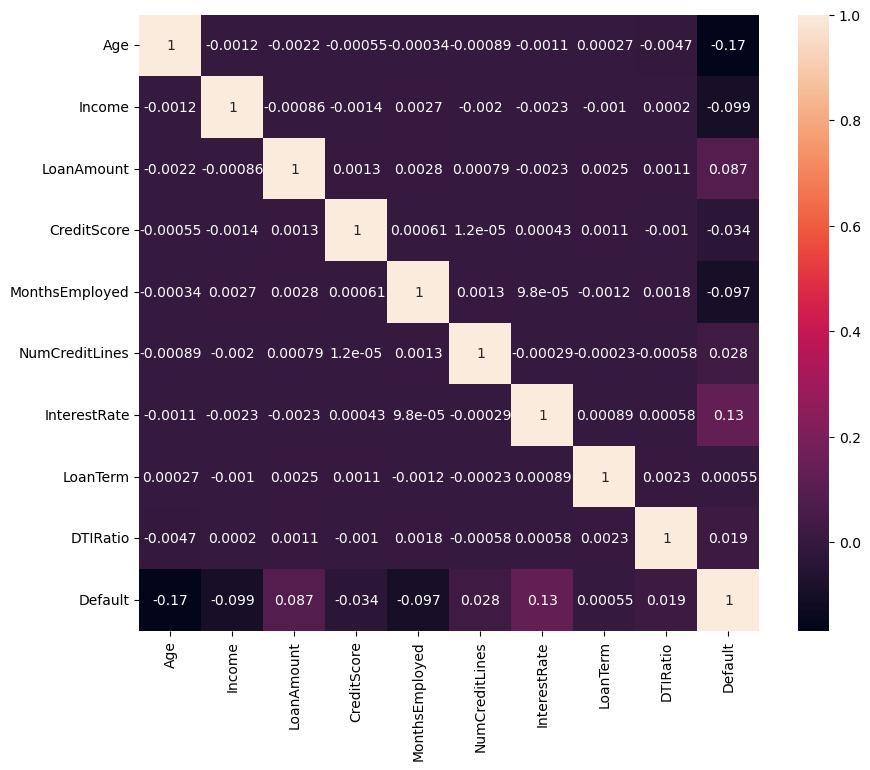

In [22]:
# Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(10,8))
corr = raw_df.drop(columns=['LoanID','Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']).corr(method='spearman')
sns.heatmap(corr, annot=True)

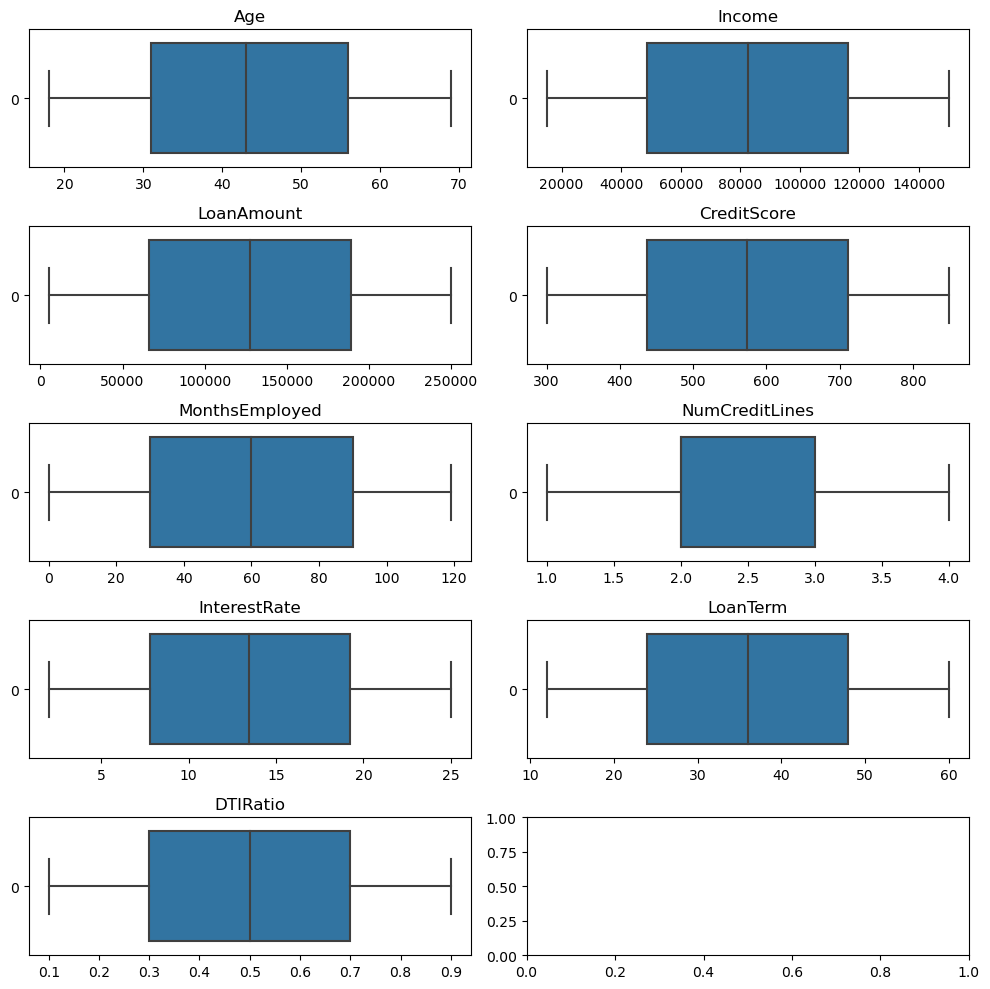

In [23]:
columns = raw_df.columns
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
sns.boxplot(raw_df.iloc[:,1],ax=axs[0, 0],orient='h').set_title(columns[1])
sns.boxplot(raw_df.iloc[:,2],ax=axs[0, 1],orient='h').set_title(columns[2])
sns.boxplot(raw_df.iloc[:,3],ax=axs[1, 0],orient='h').set_title(columns[3])
sns.boxplot(raw_df.iloc[:,4],ax=axs[1, 1],orient='h').set_title(columns[4])
sns.boxplot(raw_df.iloc[:,5],ax=axs[2, 0],orient='h').set_title(columns[5])
sns.boxplot(raw_df.iloc[:,6],ax=axs[2, 1],orient='h').set_title(columns[6])
sns.boxplot(raw_df.iloc[:,7],ax=axs[3, 0],orient='h').set_title(columns[7])
sns.boxplot(raw_df.iloc[:,8],ax=axs[3, 1],orient='h').set_title(columns[8])
sns.boxplot(raw_df.iloc[:,9],ax=axs[4, 0],orient='h').set_title(columns[9])
fig.tight_layout()


In [9]:
# Encoding columns with categorical values.

droped_df = raw_df.drop(columns=['LoanID','Education', 'MaritalStatus'])
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()

droped_df['HasMortgage']= label_encoder.fit_transform(droped_df['HasMortgage'])
droped_df['HasDependents']= label_encoder.fit_transform(droped_df['HasDependents'])
droped_df['HasCoSigner']= label_encoder.fit_transform(droped_df['HasCoSigner'])

# droped_df.head()

encoded_df = pd.get_dummies(droped_df)

# one_hot = OneHotEncoder(drop='first')

# data_object = droped_df.select_dtypes('object')
# one_hot.fit(data_object)

# codes = one_hot.transform(data_object).toarray()
# feature_names = one_hot.get_feature_names_out(data_object.columns)

# one_hot_df = pd.concat([raw_df.select_dtypes(exclude='object'), 
#                pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

encoded_df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'EmploymentType_Full-time',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

In [10]:
# Creating train test split
x = encoded_df.drop('Default', axis=1).to_numpy()
y = encoded_df['Default'].to_numpy()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, stratify=y, random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [11]:
#Create Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict)) 


Estimator: DT
[[39592  5547]
 [ 4525  1406]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45139
           1       0.20      0.24      0.22      5931

    accuracy                           0.80     51070
   macro avg       0.55      0.56      0.55     51070
weighted avg       0.82      0.80      0.81     51070



In [12]:
#Base Logistical Regression Model
from sklearn.linear_model import LogisticRegression

for name,method in [('LogReg', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: LogReg
[[44979   160]
 [ 5727   204]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.56      0.03      0.06      5931

    accuracy                           0.88     51070
   macro avg       0.72      0.52      0.50     51070
weighted avg       0.85      0.88      0.84     51070



In [18]:
# Random forest regression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=0)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)

# Making the confussion metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,predict))

[[42912  2227]
 [ 5131   800]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.56      0.03      0.06      5931

    accuracy                           0.88     51070
   macro avg       0.72      0.52      0.50     51070
weighted avg       0.85      0.88      0.84     51070



In [ ]:
# R&D Random forest with grid search

In [13]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=0))])
pipeline.insert(0,pipe_lda)

# pipe_qda = Pipeline([('scl', StandardScaler()),
#                     ('clf', QuadraticDiscriminantAnalysis())])
# pipeline.insert(1,pipe_qda)

# pipe_logreg = Pipeline([('scl', StandardScaler()),
#                     ('clf', LogisticRegression(solver='liblinear',
#                                                class_weight='balanced',
#                                                random_state=100))])   
# pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1', 'l2']}
modelpara.insert(2,param_gridlogreg)

In [20]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    # y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    # bestpara=str(gs_clf.best_params_)

    classifier = RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=0)
    classifier.fit(x_train2, y_train)

    y_pred = classifier.predict(x_test2)
    
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)

In [26]:
# Random forest regression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
param_grid = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
classifier = RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=0)

gs_clf = GridSearchCV(classifier, param_grid, cv=10,scoring='accuracy')
gs_clf = gs_clf.fit(x_train, y_train)
model = gs_clf.best_estimator_


# classifier.fit(x_train2, y_train)

y_pred = gs_clf.predict(x_test2)

# Making the confussion metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,predict))

[[45139     0]
 [ 5931     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.56      0.03      0.06      5931

    accuracy                           0.88     51070
   macro avg       0.72      0.52      0.50     51070
weighted avg       0.85      0.88      0.84     51070

